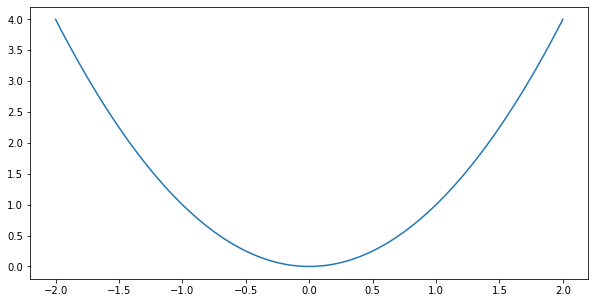

In [3]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Creating  X and Y
x = np.linspace(-2, 2, 100)
y = (x ** 2)

fig = plt.figure(figsize = (10, 5))
# zrobienie graphu
plt.plot(x, y)

# wyswietlenie graphu
plt.show()


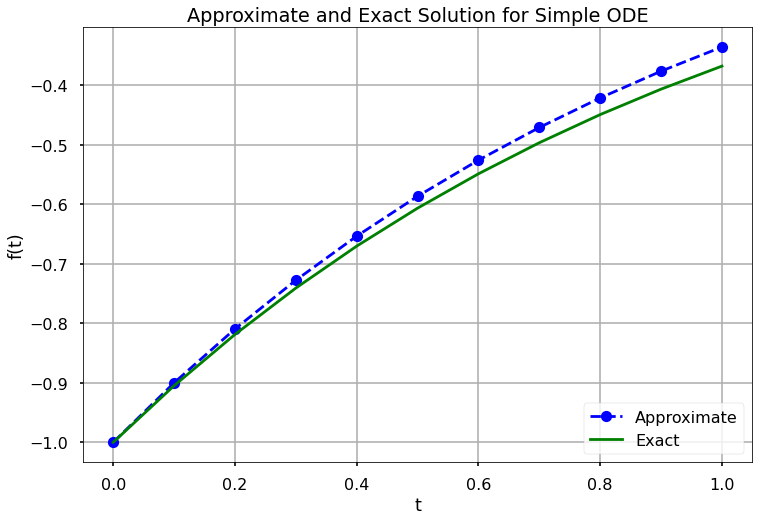

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

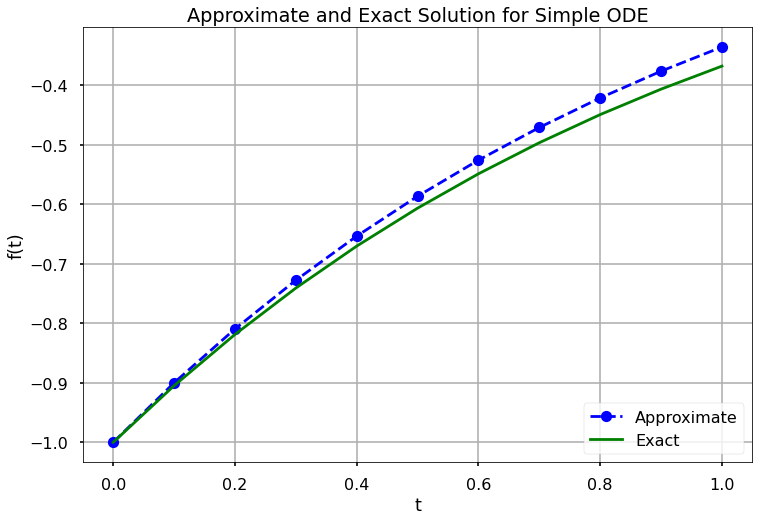

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Calculated period, T = 2.1550000000000002 s
Estimated small-displacement angle period, Tharm = 2.0060666807106475 s
SciPy calculated period, T = 2.152874666880516 s


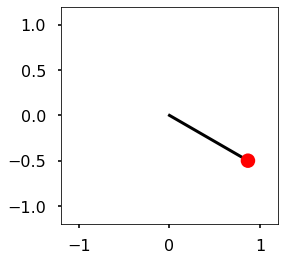

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk
import matplotlib.animation as animation

# Bob mass (kg), pendulum length (m), acceleration due to gravity (m.s-2).
m, L, g = 100, 1, 9.81
# Initial angular displacement (rad), tangential velocity (m.s-1)
theta0, v0 = np.radians(60), 0

# Estimate of the period using the harmonic (small displacement) approximation.
# The real period will be longer than this.
Tharm = 2 * np.pi * np.sqrt(L / g)
# Time step for numerical integration of the equation of motion (s).
dt = 0.001
# Initial angular position and tangential velocity.
theta, v = [theta0], [v0]
old_theta = theta0
i = 0
while True:
    # Forward Euler method for numerical integration of the ODE.
    i += 1
    t = i * dt
    # Update the bob position using its updated angle.
    old_theta, old_v = theta[-1], v[-1]
    omega = old_v / L
    new_theta = old_theta - omega * dt

    # Tangential acceleration.
    acc = g * np.sin(old_theta)
    # Update the tangential velocity.
    new_v = old_v + acc * dt

    if t > Tharm and new_v * old_v < 0:
        # At the second turning point in velocity we're back where we started,
        # i.e. we have completed one period and can finish the simulation.
        break

    theta.append(new_theta)
    v.append(new_v)

# Calculate the estimated pendulum period, T, from our numerical integration,
# and the "exact" value in terms of the complete elliptic integral of the
# first kind.
nsteps = len(theta)
T = nsteps * dt
print('Calculated period, T = {} s'.format(T))
print('Estimated small-displacement angle period, Tharm = {} s'.format(Tharm))
k = np.sin(theta0/2)
print('SciPy calculated period, T = {} s'
                .format(2 * Tharm / np.pi * ellipk(k**2)))

def get_coords(th):
    """Return the (x, y) coordinates of the bob at angle th."""
    return L * np.sin(th), -L * np.cos(th)

# Initialize the animation plot. Make the aspect ratio equal so it looks right.
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
# The pendulum rod, in its initial position.
x0, y0 = get_coords(theta0)
line, = ax.plot([0, x0], [0, y0], lw=3, c='k')
# The pendulum bob: set zorder so that it is drawn over the pendulum rod.
bob_radius = 0.08
circle = ax.add_patch(plt.Circle(get_coords(theta0), bob_radius,
                      fc='r', zorder=3))
# Set the plot limits so that the pendulum has room to swing!
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, L*1.2)

def animate(i):
    """Update the animation at frame i."""
    x, y = get_coords(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))

nframes = nsteps
interval = dt * 1000
ani = animation.FuncAnimation(fig, animate, frames=nframes, repeat=True,
                              interval=interval)
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
import glob
import os

def simple_pendulum_deriv(x, t, m, g, l): 
# The simple pendulum subject to zero damping and zero control input 
    nx = np.zeros(2)
    nx[0] = x[1]
    nx[1] = -(m * g * l * np.sin(x[0])) 
    return nx

def plot_orbit( x0 ):
    # Plot the phase space of the pendulum
    # Pick ts to be sufficiently large (by inspection) to make sure
    # that all of the cases of interest will have reached their 
    # homoclinic orbit
    ts = np.linspace(0.0, 50.0, 1001)
    ys = odeint(simple_pendulum_deriv, x0, ts, args = (1.0, 9.8, 1.0))
plt.plot(ys[:,0], ys[:,1])


def plot_pendulum(q, length = 1.0):
    xs = [  0.0,  length * np.sin(q[0]) ]
    ys = [  0.0, -length * np.cos(q[0]) ]
    plt.plot( xs, ys, 'b-', linewidth = 3 )
    plt.plot( xs[1], ys[1], 'ro' )
    plt.gca().set_xlim([-1.2, 1.2])
    plt.gca().set_ylim([-1.2, 1.2])
    plt.gca().set_aspect('equal')

def plot_interesting_orbits():
    plt.clf()
    # start with zero velocity at a number of differing angles
    # scipy odeint does some pretty weird things if you have enough
    # velocity to loop around
    plot_orbit(np.array([np.pi * 0.25, 0.0]))
    plot_orbit(np.array([np.pi * 0.5, 0.0]))
    plot_orbit(np.array([np.pi * 0.9, 0.0]))
    plot_orbit(np.array([np.pi * 0.999, 0.0]))
    plt.title('homoclinic orbits for an undamped simpled pendulum')
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$\dot{\theta}$')
    plt.show()

NameError: name 'ys' is not defined

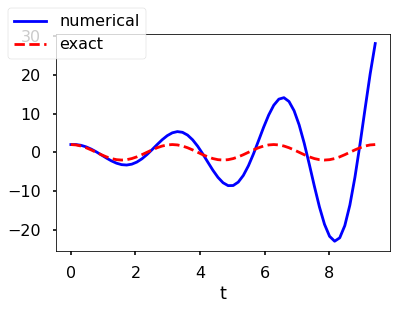

<Figure size 432x288 with 0 Axes>

In [15]:
from numpy import zeros, linspace, pi, cos, array
import matplotlib.pyplot as plt

omega = 2
P = 2*pi/omega
dt = P/20
T = 3*P
N_t = int(round(T/dt))
t = linspace(0, N_t*dt, N_t+1)

u = zeros(N_t+1)
v = zeros(N_t+1)

# Initial condition
X_0 = 2
u[0] = X_0
v[0] = 0

# Step equations forward in time
for n in range(N_t):
    u[n+1] = u[n] + dt*v[n]
    v[n+1] = v[n] - dt*omega**2*u[n]

fig = plt.figure()
l1, l2 = plt.plot(t, u, 'b-', t, X_0*cos(omega*t), 'r--')
fig.legend((l1, l2), ('numerical', 'exact'), 'upper left')
plt.xlabel('t')
plt.show()
plt.savefig('tmp.pdf'); plt.savefig('tmp.png')

In [19]:
def linear_damping():
    b = 0.3
    f = lambda v: b*v
    s = lambda u: k*u
    F = lambda t: 0

    m = 1
    k = 1
    U_0 = 1
    V_0 = 0

    T = 12*pi
    dt = T/5000.

    u, v, t = EulerCromer(f=f, s=s, F=F, m=m, T=T,
                          U_0=U_0, V_0=V_0, dt=dt)
    plot_u(u, t)
    plt.show()

NameError: name 'Text' is not defined

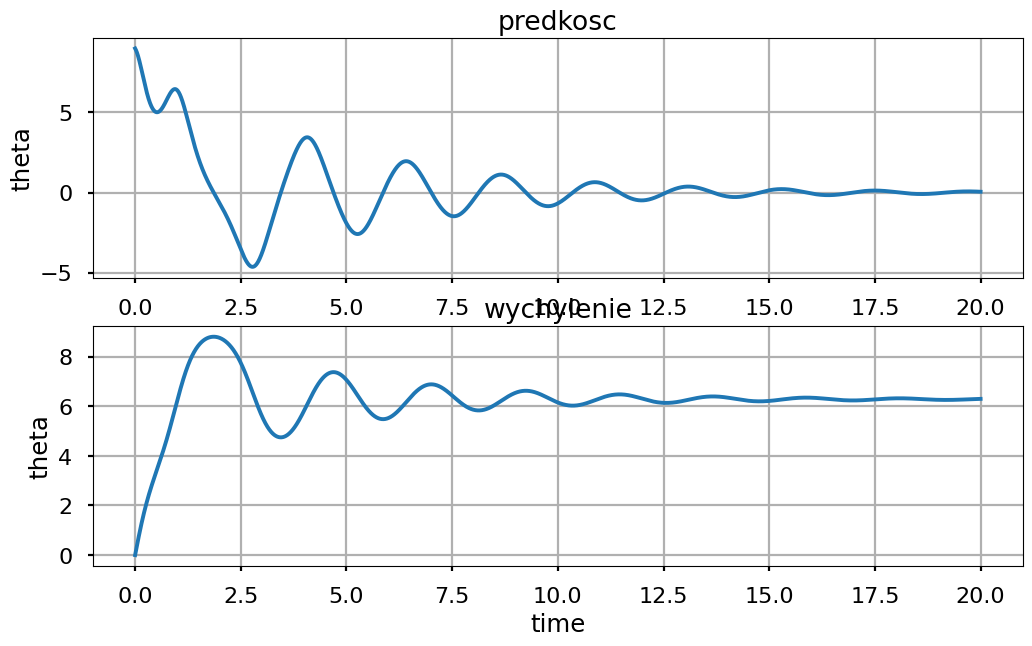

In [21]:
## --skrypt realizujacy symulacje dla przykladuz wahadlem matematycznym bez tlumienia (zajecia 1 )
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 100 
# -- wyprowadzenie modelu matematycznego przedstawiam krok po kroku w filmie, dostępnym na YT
# https://youtu.be/BP613iafk5o
# -dane wejsciowe
g = 9.81
l = 1.2
# -model matematyczny
A = np.identity(2)
B = np.zeros((2, 2))

# zapewnienie spojnosci modelu
B[1, 0] = -1

#-wprowadzanie wspolczynnika tlumienia do ukladu rownan
B[0, 0] = 0.5

#-tworze pusty wektor prawej strony ukladu rownan
F = np.zeros((2, 1))
#-definicja dziedziny czasu
t0 = 0
tf = 20
dt = 1E-4
t = np.arange(t0, tf, dt)
#-definicja warunkow poczatkowych
y0 = np.array([[9], [0*np.pi]])
#-alokacja pamieci na wyniki
wyn = np.zeros((2, t.size))
#-tworze zmienna pomocnicza na wyniki poszczegolnych iteracji
Result = y0.copy()
#----procedura obliczeniowa-------
#-wprowadzanie warunku poczatkowego do tablicy na wyniki
for i in range(0, max(y0.shape)):
    wyn[i, 0] = y0[i]

#-definiuje funkcje typu in-line do wyznaczania wartosci chwilowych dla prawej strony ukladu rownan
f = lambda x: (-g/l)*np.sin(x)

#-implementuje rozwiazanie numeryczne metoda Euler'a
for k in range(0, max(t.shape)-1):
    F[0] = f(Result[1])
    Result += np.linalg.inv(A) @ (F - B @ Result) * dt
    wyn[0, k+1] = Result[0]
    wyn[1, k+1] = Result[1]
# -rysowanie wykresu 
fig, axs = plt.subplots(2)

axs[0].plot(t, wyn[0, :])
axs[0].grid()
# axs[0].set_xlabel('time')
axs[0].set_ylabel('theta')
axs[0].set_title('predkosc')

axs[1].plot(t, wyn[1,:])
axs[1].grid()
axs[1].set_xlabel('time')
axs[1].set_ylabel('theta')
axs[1].set_title('wychylenie')
Text(0.5, 1.0, 'wychylenie')

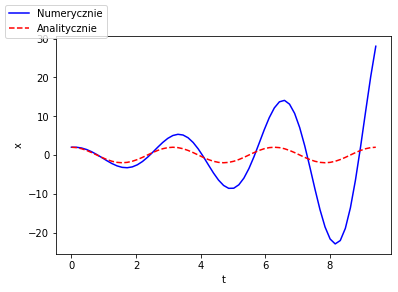

<Figure size 432x288 with 0 Axes>

In [6]:
from numpy import zeros, linspace, pi, cos, array
import matplotlib.pyplot as plt

omega = 2
P = 2*pi/omega
dt = P/20
T = 3*P
liczbaInterwalow = int(round(T/dt))
osPozioma = linspace(0, liczbaInterwalow*dt, liczbaInterwalow+1)

u = zeros(liczbaInterwalow+1)
v = zeros(liczbaInterwalow+1)

# warunki poczatkowe
X_0 = 2
u[0] = X_0
v[0] = 0

# kolejne kroki metoda Eulera
for n in range(liczbaInterwalow):
    u[n+1] = u[n] + dt*v[n]
    v[n+1] = v[n] - dt*omega**2*u[n]

fig = plt.figure()
l1, l2 = plt.plot(osPozioma, u, 'b-', osPozioma, X_0*cos(omega*osPozioma), 'r--')
fig.legend((l1, l2), ('Numerycznie', 'Analitycznie'), 'upper left')
plt.xlabel('t')
plt.ylabel('x')
plt.show()
plt.savefig('tmp.pdf'); plt.savefig('tmp.png')